In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('D:/Bansi/SE/EDSTASK1.csv')

In [3]:
data['start_datetime'] = pd.to_datetime(data['start.date'].astype(str) + ' ' + data['start.time'])

In [4]:
data.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5,start_datetime
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN,2002-02-13 04:22:52
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2,2002-02-13 07:03:52


In [102]:
data.columns = data.columns.str.replace('.','_')

In [101]:
data.head()

,flare,start_date,start_time,peak,end,duration_s,peak_c/s,total_counts,energy_kev,x_pos_asec,...,active_region_ar,flag_1,flag_2,flag_3,flag_4,flag_5,start_datetime,start_hour,end_datetime,duration
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,...,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56,21,2002-02-12 21:41:48,712.0
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,...,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08,21,2002-02-12 21:48:56,288.0
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,...,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24,0,2002-02-13 00:57:00,216.0
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400,12-25,-277,...,9822,A1,P1,NaN,NaN,NaN,2002-02-13 04:22:52,4,2002-02-13 04:26:56,244.0
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392,25-50,-272,...,9825,A1,GS,P1,PE,Q2,2002-02-13 07:03:52,7,2002-02-13 07:07:48,236.0


In [13]:
data['end_datetime'] = pd.to_datetime(data['start_date'].astype(str) + ' ' + data['end'])

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   flare             113942 non-null  int64         
 1   start_date        113942 non-null  object        
 2   start_time        113942 non-null  object        
 3   peak              113942 non-null  object        
 4   end               113942 non-null  object        
 5   duration_s        113942 non-null  int64         
 6   peak_c/s          113942 non-null  int64         
 7   total_counts      113942 non-null  int64         
 8   energy_kev        113942 non-null  object        
 9   x_pos_asec        113942 non-null  int64         
 10  y_pos_asec        113942 non-null  int64         
 11  radial            113942 non-null  int64         
 12  active_region_ar  113942 non-null  int64         
 13  flag_1            113942 non-null  object        
 14  flag

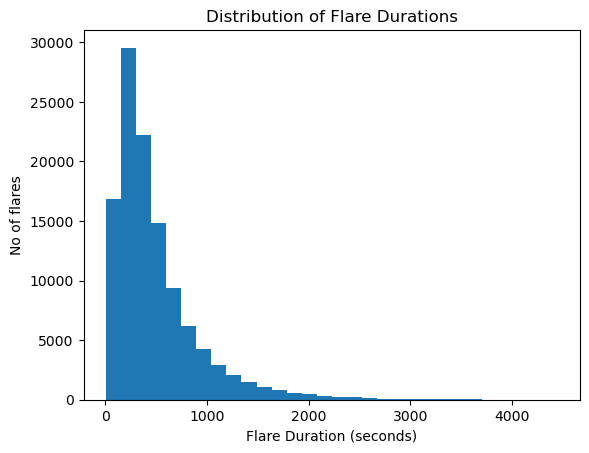

In [90]:
plt.hist(data['duration_s'], bins = 30)
plt.xlabel('Flare Duration (seconds)')
plt.ylabel('No of flares')
plt.title('Distribution of Flare Durations')
plt.show()

The above histogram shows the frequeny of flare duration of the given data. It is seen that the no of flares decrease as the duration increases. Which means most of the flares recorded have a smaller duration(in the range of 0-1000sec).

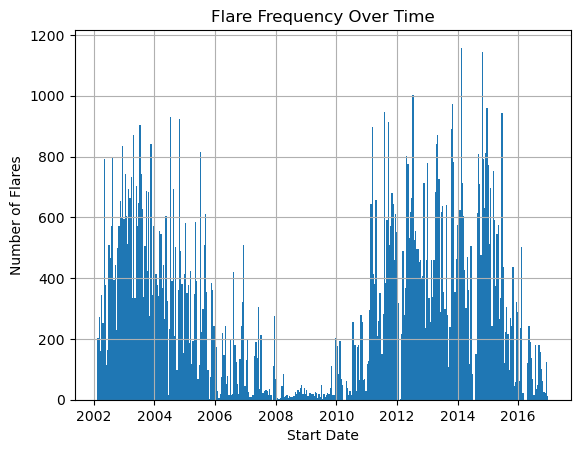

In [105]:
data['start_datetime'].hist(bins=365)
plt.xlabel('Start Date')
plt.ylabel('Number of Flares')
plt.title('Flare Frequency Over Time')
plt.show()

The above histogram shows no of flares that were recorded over 14 years, from 2002 to 2016.

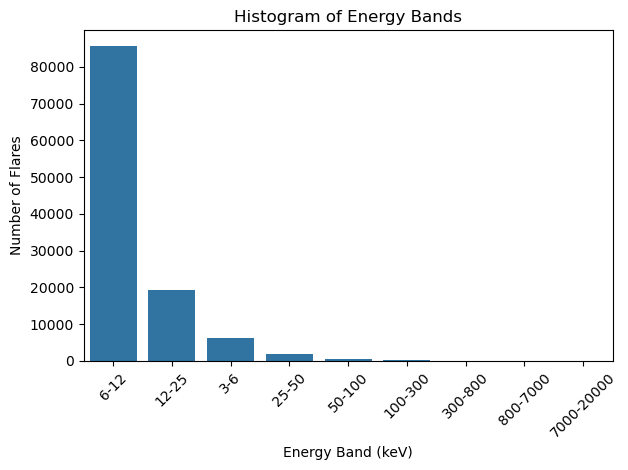

In [41]:
energy_counts = data['energy_kev'].value_counts()
sns.barplot(x=energy_counts.index, y=energy_counts.values)
plt.title('Histogram of Energy Bands')
plt.xlabel('Energy Band (keV)')
plt.ylabel('Number of Flares')
plt.xticks(rotation=45)

plt.tight_layout()



The above graph shows the energy range in which the flares are emitted.

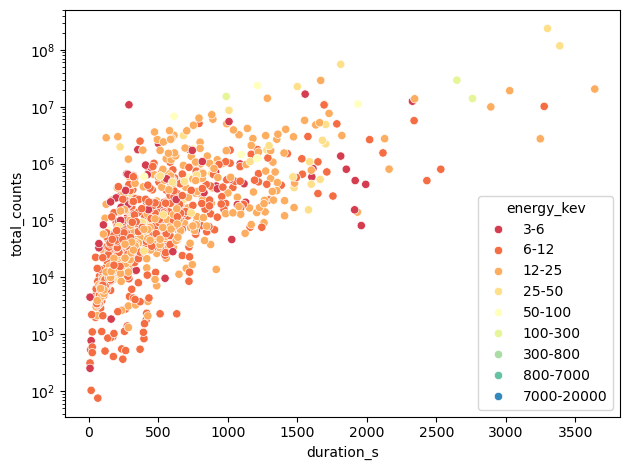

In [100]:
colors = ['3-6','6-12','12-25','25-50','50-100','100-300','300-800','800-7000','7000-20000']
#size = data['energy_kev'][0:1000].value_counts()
sns.scatterplot(x=data['duration_s'][0:1000], y=data['total_counts'][0:1000],
                        hue=data['energy_kev'], hue_order = colors, palette = 'Spectral')
plt.yscale('log')
plt.xscale('linear')
plt.tight_layout()


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   flare             113942 non-null  int64         
 1   start_date        113942 non-null  object        
 2   start_time        113942 non-null  object        
 3   peak              113942 non-null  object        
 4   end               113942 non-null  object        
 5   duration_s        113942 non-null  int64         
 6   peak_c/s          113942 non-null  int64         
 7   total_counts      113942 non-null  int64         
 8   energy_kev        113942 non-null  object        
 9   x_pos_asec        113942 non-null  int64         
 10  y_pos_asec        113942 non-null  int64         
 11  radial            113942 non-null  int64         
 12  active_region_ar  113942 non-null  int64         
 13  flag_1            113942 non-null  object        
 14  flag